**A larger example**

build a model for a more feature rich dataset 🔖

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [2]:
insurance #this is a little more complex than what we have been working with..

#take in these features, learn the relationship between these features to figure out the target variable (charges)

#dependent variable (charges), features (everything else)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#whats the first step to getting our data ready for modeling

#some cols are numerical, others are non numerical
insurance["sex"], insurance["age"]

#we need our features to be numerically encoded (input features)

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [4]:
#need to use one hot encoding

insurance_one_hot = pd.get_dummies(insurance, dtype = int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
from sklearn.model_selection import train_test_split

X = insurance_one_hot.drop(["charges"], axis = 1)
y = insurance_one_hot["charges"]

In [6]:
X.head(), y.head() #viewing the split data

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #sklearns train test split, random train and test subsets

In [8]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [9]:
X_train #here can see the indicies are randomly shuffled

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [11]:
tf.random.set_seed(42)

#build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name ="input"),
    tf.keras.layers.Dense(1, name = "output")
])

#complile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

#fit the model
model_1.fit(X_train, y_train, epochs = 100, verbose = 1) #do we need to adjust the pandas and sklearn data

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9935.3613 - mae: 9935.3613  
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7690.1689 - mae: 7690.1689
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7743.0474 - mae: 7743.0474
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7351.1240 - mae: 7351.1240
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7799.9375 - mae: 7799.9375
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7545.0908 - mae: 7545.0908
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7290.0776 - mae: 7290.0776
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7827.3628 - mae: 7827.3628
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7481.3374 - mae: 7481.3374
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7547.2378 - mae: 7547.2378
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7566.2314 - mae: 7566.2314
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/ste

In [12]:
model_1_preds = model_1.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


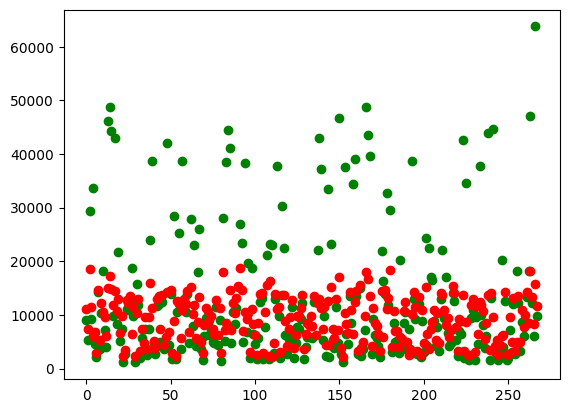

In [13]:
train_indicies = range(len(y_train))
test_indicies = range(len(y_test))
plt.scatter(test_indicies, y_test, c = "g")
plt.scatter(test_indicies, model_1_preds, c = "r")

#the model is fitting the the majority and not detecting outliers well, it predicts everything within a tight range

In [14]:
mae = tf.keras.losses.mae(y_test, tf.squeeze(model_1_preds))
mae.numpy()

6190.548

In [15]:
mape = tf.keras.losses.mape(y_test, tf.squeeze(model_1_preds))
mape.numpy() #pretty far off on average, not so great, #however this is a case where mape can be greater than 1000

41.449978

In [16]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

model_2.fit(X_train, y_train, epochs = 100, verbose = 2) #why is it all nan, model is too complex to learn anything

Epoch 1/100
34/34 - 2s - 70ms/step - loss: 13281.0859 - mae: 13281.0859
Epoch 2/100
34/34 - 0s - 9ms/step - loss: 13078.6426 - mae: 13078.6426
Epoch 3/100
34/34 - 0s - 12ms/step - loss: 12666.0557 - mae: 12666.0557
Epoch 4/100
34/34 - 1s - 17ms/step - loss: 11883.2217 - mae: 11883.2217
Epoch 5/100
34/34 - 0s - 9ms/step - loss: 10631.8154 - mae: 10631.8154
Epoch 6/100
34/34 - 0s - 12ms/step - loss: 9149.8584 - mae: 9149.8584
Epoch 7/100
34/34 - 1s - 21ms/step - loss: 7932.2852 - mae: 7932.2852
Epoch 8/100
34/34 - 1s - 18ms/step - loss: 7462.3564 - mae: 7462.3564
Epoch 9/100
34/34 - 0s - 14ms/step - loss: 7400.3179 - mae: 7400.3179
Epoch 10/100
34/34 - 1s - 15ms/step - loss: 7378.8022 - mae: 7378.8022
Epoch 11/100
34/34 - 0s - 7ms/step - loss: 7358.3223 - mae: 7358.3223
Epoch 12/100
34/34 - 0s - 3ms/step - loss: 7337.3125 - mae: 7337.3125
Epoch 13/100
34/34 - 0s - 4ms/step - loss: 7316.0508 - mae: 7316.0508
Epoch 14/100
34/34 - 0s - 3ms/step - loss: 7295.0366 - mae: 7295.0366
Epoch 15/10

In [17]:
model_2.evaluate(X_test, y_test) #more layers and an adam optimizer improved the model

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4789.2310 - mae: 4789.2310  


[4658.18212890625, 4658.18212890625]

In [18]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history = model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13279.8525 - mae: 13279.8525
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13154.0244 - mae: 13154.0244
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12898.2676 - mae: 12898.2676
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12363.8096 - mae: 12363.8096
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11393.7148 - mae: 11393.7148
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9992.1484 - mae: 9992.1484  
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8515.6533 - mae: 8515.6533
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7575.9375 - mae: 7575.9375
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7381.9570 - mae: 7381.9570
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7351.0132 - mae: 7351.0132
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7330.4326 - mae: 7330.4326
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 

In [19]:
model_3.evaluate(X_test, y_test) #lets make sure it improved agasint the test data and hasnt just overfit to the training data

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3479.4160 - mae: 3479.4160  


[3413.135009765625, 3413.135009765625]

Text(0, 0.5, 'loss')

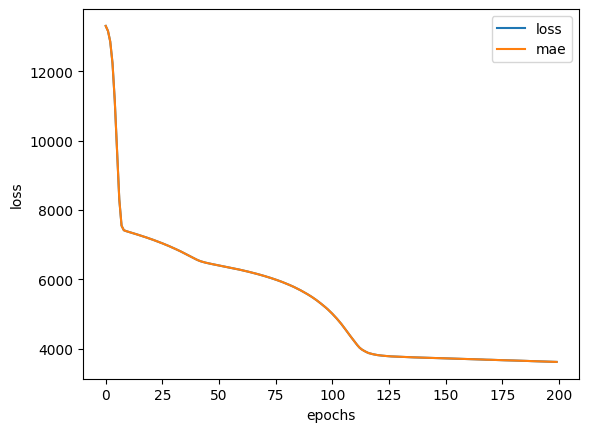

In [20]:
#plot history also knowno as a loss curve

pd.DataFrame(history.history).plot() #beautiful decreasing loss curve
plt.xlabel("epochs")
plt.ylabel("loss")

this plot helps understand how long we should train the model for, when the loss metric flatlines its probably a good idea to stop training the model for this we can add in the earlystopping callback to our model

confused on how to plot preds with so many x_features

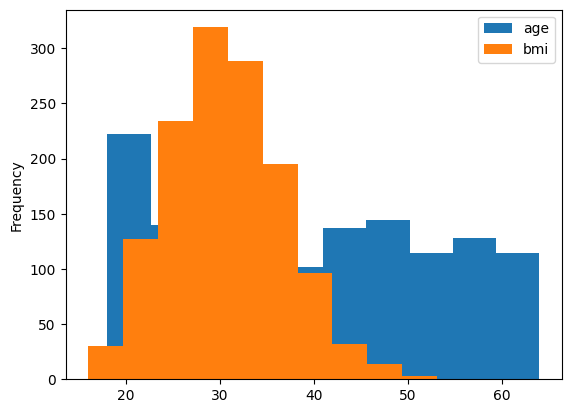

In [28]:
#preprocessing data, normalization and standardization

#neural networks tend to prefer normalization... what is normalization in machine learning.. changes numeric values to a common
#scale with out distorting differences with in the range of values

X["age"].plot(kind = "hist")
X["bmi"].plot(kind = "hist")
plt.legend();

#normalization change numeric values in a dataset to a common scale, so each feature has the same weight.

#converts to 0 and 1 while preserving the distribution

In [ ]:
#we are going to normalize our data instead of standardize which would make everyhting a normal distribution,

#normalizing preserves the distribution MinMaxScaler, standardization would be sklearns standard scalar

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")

In [35]:
#lets normalize the numerical features and handle the non numemrical features as well

#to prepare our data we can borrow a few classes form sklearn

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#min max scaler transform feaures in the given range 0 and 1

#create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "children", "bmi"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

#Create X and y values

X = insurance.drop(["charges"], axis = 1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#fit the column transformer to the training data and use that column transformer to transform the test data
ct.fit(X_train)

#transforming datasets
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [36]:
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.4       , 0.10734463, 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [37]:
X_train.shape, X_train_normal.shape #the shape changes because of onehotencoding adding extra cols, our data is ready to build and pass to a neural network model

((1070, 6), (1070, 11))

Beautiful, our data has been normalized and onehotencoded now its time to build a neural network model and see how it performs

In [40]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["mae"]
)

history_4 = model_4.fit(X_train_normal, y_train, epochs = 200, verbose = 1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13297.5742 - mae: 13297.5742
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13291.5576 - mae: 13291.5576
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13276.1475 - mae: 13276.1475
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13240.7070 - mae: 13240.7070
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13173.6104 - mae: 13173.6104
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13063.7539 - mae: 13063.7539
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12900.6943 - mae: 12900.6943
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12674.2783 - mae: 12674.2783
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12374.6250 - mae: 12374.6250
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11993.5244 - mae: 11993.5244
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11537.4697 - mae: 11537.4697
Epoch 12/200
34/34 ━━━━━━━━━━━

In [42]:
model_4.evaluate(X_test_normal, y_test) #strongest predictions yet, must evaluate on the same type of data it was trained on in this case normalized data

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3213.5164 - mae: 3213.5164  


[3160.6787109375, 3160.6787109375]

In [44]:
model_4_preds = model_4.predict(X_test_normal)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [50]:
mae4 = tf.keras.losses.mae(y_test, tf.squeeze(model_4_preds))
mae4.numpy() #gathering metrics

3160.6787

<Axes: >

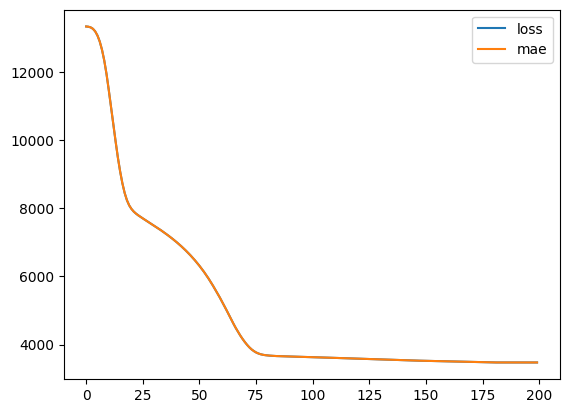

In [51]:
pd.DataFrame(history_4.history).plot() #model pretty much flatlines after 75-100 epochs, maybe a more complex model will help it get better results

In [53]:
#massive model imporvement from normalizing the data, MinMaxScaler preserves the original distribution

#normalization faster convergence time, learns the data and gets better results in less epochs

model_4.save("/content/model_4.keras")